In [ ]:
!pip install scikit-fuzzy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 9.8 MB/s eta 0:00:00


In [ ]:
# NAMA: AHMAD FAHMI ABDILLAH
# NIM : 221011400489
# KELAS: 05TPLM006

In [ ]:
class Fuzzy:
    def __init__(self):
        self.min = 0
        self.max = 0

    def down(self, x):
        return (self.max - x) / (self.max - self.min)

    def up(self, x):
        return (x - self.min) / (self.max - self.min)

    def rev_down(self, value):
        return self.max - value * (self.max - self.min)

    def rev_up(self, value):
        return value * (self.max - self.min) + self.min


class ServiceSpeed(Fuzzy):
    def __init__(self):
        self.min = 0
        self.max = 100

    def slow(self, x):
        if x < self.min:
            return 1
        if x > self.max:
            return 0
        return self.down(x)

    def moderate(self, x):
        if x <= self.min or x >= self.max:
            return 0
        if self.min < x <= (self.min + self.max) / 2:
            return self.up(x)
        if (self.min + self.max) / 2 < x <= self.max:
            return self.down(x)

    def fast(self, x):
        if x < self.min:
            return 0
        if x > self.max:
            return 1
        return self.up(x)


class FoodQuality(Fuzzy):
    def __init__(self):
        self.min = 0
        self.max = 100

    def bad(self, x):
        if x < self.min:
            return 1
        if x > self.max:
            return 0
        return self.down(x)

    def average(self, x):
        if x <= self.min or x >= self.max:
            return 0
        if self.min < x <= (self.min + self.max) / 2:
            return self.up(x)
        if (self.min + self.max) / 2 < x <= self.max:
            return self.down(x)

    def good(self, x):
        if x < self.min:
            return 0
        if x > self.max:
            return 1
        return self.up(x)


class RestaurantAmbience(Fuzzy):
    def __init__(self):
        self.min = 0
        self.max = 100

    def uncomfortable(self, x):
        if x < self.min:
            return 1
        if x > self.max:
            return 0
        return self.down(x)

    def moderate(self, x):
        if x <= self.min or x >= self.max:
            return 0
        if self.min < x <= (self.min + self.max) / 2:
            return self.up(x)
        if (self.min + self.max) / 2 < x <= self.max:
            return self.down(x)

    def comfortable(self, x):
        if x < self.min:
            return 0
        if x > self.max:
            return 1
        return self.up(x)


class Happiness(Fuzzy):
    def __init__(self):
        self.min = 0
        self.max = 100

    def unhappy(self, fuzzy_value):
        return self.rev_down(fuzzy_value)

    def neutral(self, fuzzy_value):
        return (self.rev_down(fuzzy_value) + self.rev_up(fuzzy_value)) / 2

    def happy(self, fuzzy_value):
        return self.rev_up(fuzzy_value)

    def very_happy(self, fuzzy_value):
        # Menggunakan fungsi linear untuk menghindari ketidakseimbangan
        # Asumsikan "very happy" lebih tinggi dari "happy" dalam rentang
        return self.rev_up(fuzzy_value) + 0.2 * (self.max - self.min)  # Sesuaikan skala sesuai kebutuhan


# Input variables
service = ServiceSpeed()
quality = FoodQuality()
ambience = RestaurantAmbience()
happiness = Happiness()

# Example inputs
x_service = 78  # Kecepatan pelayanan
x_quality = 90  # Kualitas makanan
x_ambience = 85  # Suasana restoran

# Fuzzification
service_slow = service.slow(x_service)
service_moderate = service.moderate(x_service)
service_fast = service.fast(x_service)

quality_bad = quality.bad(x_quality)
quality_average = quality.average(x_quality)
quality_good = quality.good(x_quality)

ambience_uncomfortable = ambience.uncomfortable(x_ambience)
ambience_moderate = ambience.moderate(x_ambience)
ambience_comfortable = ambience.comfortable(x_ambience)

# Rules (27 combinations)
rules = {
    ("slow", "bad", "uncomfortable"): "unhappy",
    ("slow", "bad", "moderate"): "unhappy",
    ("slow", "bad", "comfortable"): "unhappy",
    ("slow", "average", "uncomfortable"): "neutral",
    ("slow", "average", "moderate"): "neutral",
    ("slow", "average", "comfortable"): "neutral",
    ("slow", "good", "uncomfortable"): "neutral",
    ("slow", "good", "moderate"): "neutral",
    ("slow", "good", "comfortable"): "happy",
    ("moderate", "bad", "uncomfortable"): "unhappy",
    ("moderate", "bad", "moderate"): "neutral",
    ("moderate", "bad", "comfortable"): "neutral",
    ("moderate", "average", "uncomfortable"): "neutral",
    ("moderate", "average", "moderate"): "neutral",
    ("moderate", "average", "comfortable"): "happy",
    ("moderate", "good", "uncomfortable"): "happy",
    ("moderate", "good", "moderate"): "happy",
    ("moderate", "good", "comfortable"): "happy",
    ("fast", "bad", "uncomfortable"): "neutral",
    ("fast", "bad", "moderate"): "neutral",
    ("fast", "bad", "comfortable"): "neutral",
    ("fast", "average", "uncomfortable"): "happy",
    ("fast", "average", "moderate"): "happy",
    ("fast", "average", "comfortable"): "happy",
    ("fast", "good", "uncomfortable"): "happy",
    ("fast", "good", "moderate"): "happy",
    ("fast", "good", "comfortable"): "very_happy",
}

# Inference
fuzzy_real = 0
fuzzy = 0

for (service_level, quality_level, ambience_level), result in rules.items():
    service_value = getattr(service, service_level)(x_service)
    quality_value = getattr(quality, quality_level)(x_quality)
    ambience_value = getattr(ambience, ambience_level)(x_ambience)

    rule_value = min(service_value, quality_value, ambience_value)
    happiness_value = getattr(happiness, result)(rule_value)

    fuzzy_real += rule_value * happiness_value
    fuzzy += rule_value

# Defuzzification
result = fuzzy_real / fuzzy if fuzzy != 0 else 0
print(f"Tingkat kebahagiaan pelanggan: {result:.2f}")


Tingkat kebahagiaan pelanggan: 51.05


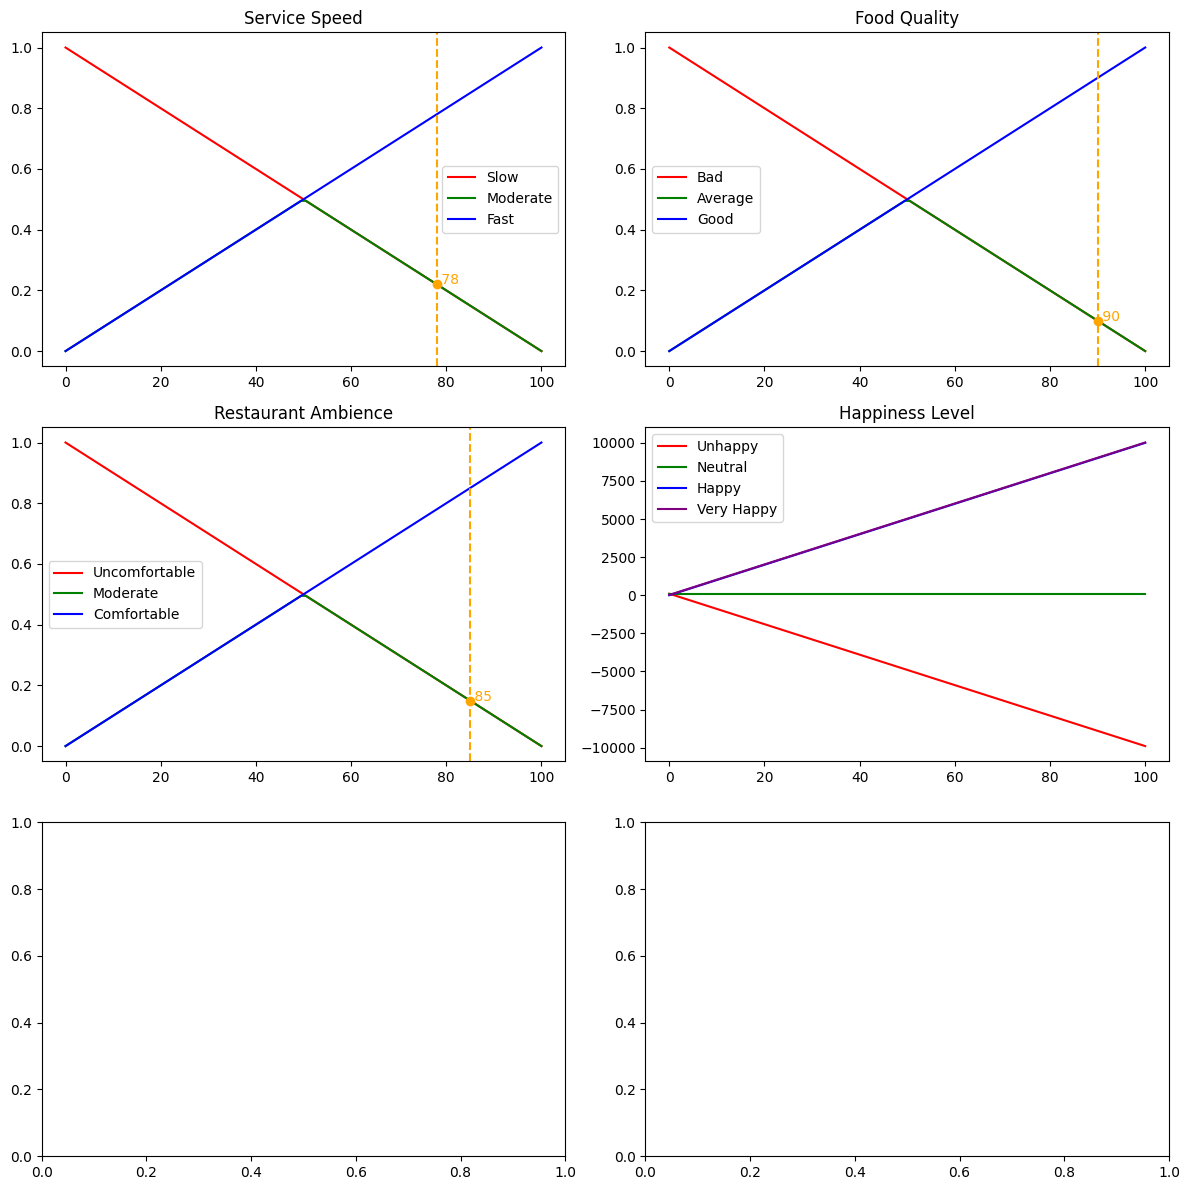

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Defining the fuzzy membership functions for service speed, food quality, and ambience
class Fuzzy:
    def __init__(self, min_value, max_value):
        self.min = min_value
        self.max = max_value

    def down(self, x):
        return np.maximum(0, (self.max - x) / (self.max - self.min))

    def up(self, x):
        return np.maximum(0, (x - self.min) / (self.max - self.min))

    def rev_down(self, value):
        return self.max - value * (self.max - self.min)

    def rev_up(self, value):
        return value * (self.max - self.min) + self.min

class ServiceSpeed(Fuzzy):
    def __init__(self):
        super().__init__(0, 100)

    def slow(self, x):
        return self.down(x)

    def moderate(self, x):
        return np.where((x > 0) & (x < 100), np.minimum(self.up(x), self.down(x)), 0)

    def fast(self, x):
        return self.up(x)

class FoodQuality(Fuzzy):
    def __init__(self):
        super().__init__(0, 100)

    def bad(self, x):
        return self.down(x)

    def average(self, x):
        return np.where((x > 0) & (x < 100), np.minimum(self.up(x), self.down(x)), 0)

    def good(self, x):
        return self.up(x)

class RestaurantAmbience(Fuzzy):
    def __init__(self):
        super().__init__(0, 100)

    def uncomfortable(self, x):
        return self.down(x)

    def moderate(self, x):
        return np.where((x > 0) & (x < 100), np.minimum(self.up(x), self.down(x)), 0)

    def comfortable(self, x):
        return self.up(x)

class Happiness(Fuzzy):
    def __init__(self):
        super().__init__(0, 100)

    def unhappy(self, fuzzy_value):
        return self.rev_down(fuzzy_value)

    def neutral(self, fuzzy_value):
        return (self.rev_down(fuzzy_value) + self.rev_up(fuzzy_value)) / 2

    def happy(self, fuzzy_value):
        return self.rev_up(fuzzy_value)

    def very_happy(self, fuzzy_value):
        return self.rev_up(fuzzy_value) + 0.2 * (self.max - self.min)  # Adjusted for "very happy"


# Create fuzzy objects for each factor
service = ServiceSpeed()
quality = FoodQuality()
ambience = RestaurantAmbience()
happiness = Happiness()

# Create input ranges
x = np.linspace(0, 100, 100)

# Generate fuzzy values for service speed, food quality, and ambience
service_slow = service.slow(x)
service_moderate = service.moderate(x)
service_fast = service.fast(x)

quality_bad = quality.bad(x)
quality_average = quality.average(x)
quality_good = quality.good(x)

ambience_uncomfortable = ambience.uncomfortable(x)
ambience_moderate = ambience.moderate(x)
ambience_comfortable = ambience.comfortable(x)

# Plot the fuzzy membership functions
fig, axs = plt.subplots(3, 2, figsize=(12, 12))

# Service Speed plot
axs[0, 0].plot(x, service_slow, label='Slow', color='red')
axs[0, 0].plot(x, service_moderate, label='Moderate', color='green')
axs[0, 0].plot(x, service_fast, label='Fast', color='blue')
axs[0, 0].set_title('Service Speed')
axs[0, 0].legend()

# Food Quality plot
axs[0, 1].plot(x, quality_bad, label='Bad', color='red')
axs[0, 1].plot(x, quality_average, label='Average', color='green')
axs[0, 1].plot(x, quality_good, label='Good', color='blue')
axs[0, 1].set_title('Food Quality')
axs[0, 1].legend()

# Ambience plot
axs[1, 0].plot(x, ambience_uncomfortable, label='Uncomfortable', color='red')
axs[1, 0].plot(x, ambience_moderate, label='Moderate', color='green')
axs[1, 0].plot(x, ambience_comfortable, label='Comfortable', color='blue')
axs[1, 0].set_title('Restaurant Ambience')
axs[1, 0].legend()

# Happiness plot
happiness_unhappy = happiness.unhappy(x)
happiness_neutral = happiness.neutral(x)
happiness_happy = happiness.happy(x)
happiness_very_happy = happiness.very_happy(x)

axs[1, 1].plot(x, happiness_unhappy, label='Unhappy', color='red')
axs[1, 1].plot(x, happiness_neutral, label='Neutral', color='green')
axs[1, 1].plot(x, happiness_happy, label='Happy', color='blue')
axs[1, 1].plot(x, happiness_very_happy, label='Very Happy', color='purple')
axs[1, 1].set_title('Happiness Level')
axs[1, 1].legend()

# Menambahkan garis vertikal pada nilai input
axs[0, 0].axvline(x=78, color='orange', linestyle='--', label='Input Service: 78')
axs[0, 1].axvline(x=90, color='orange', linestyle='--', label='Input Quality: 90')
axs[1, 0].axvline(x=85, color='orange', linestyle='--', label='Input Ambience: 85')

# Menambahkan marker pada titik input
axs[0, 0].scatter(78, service.slow(78), color='orange', zorder=5)
axs[0, 1].scatter(90, quality.bad(90), color='orange', zorder=5)
axs[1, 0].scatter(85, ambience.uncomfortable(85), color='orange', zorder=5)

# Tambahkan label atau teks untuk penjelasan
axs[0, 0].text(78, service.slow(78), ' 78', color='orange')
axs[0, 1].text(90, quality.bad(90), ' 90', color='orange')
axs[1, 0].text(85, ambience.uncomfortable(85), ' 85', color='orange')

# Adjust layout
plt.tight_layout()
plt.show()


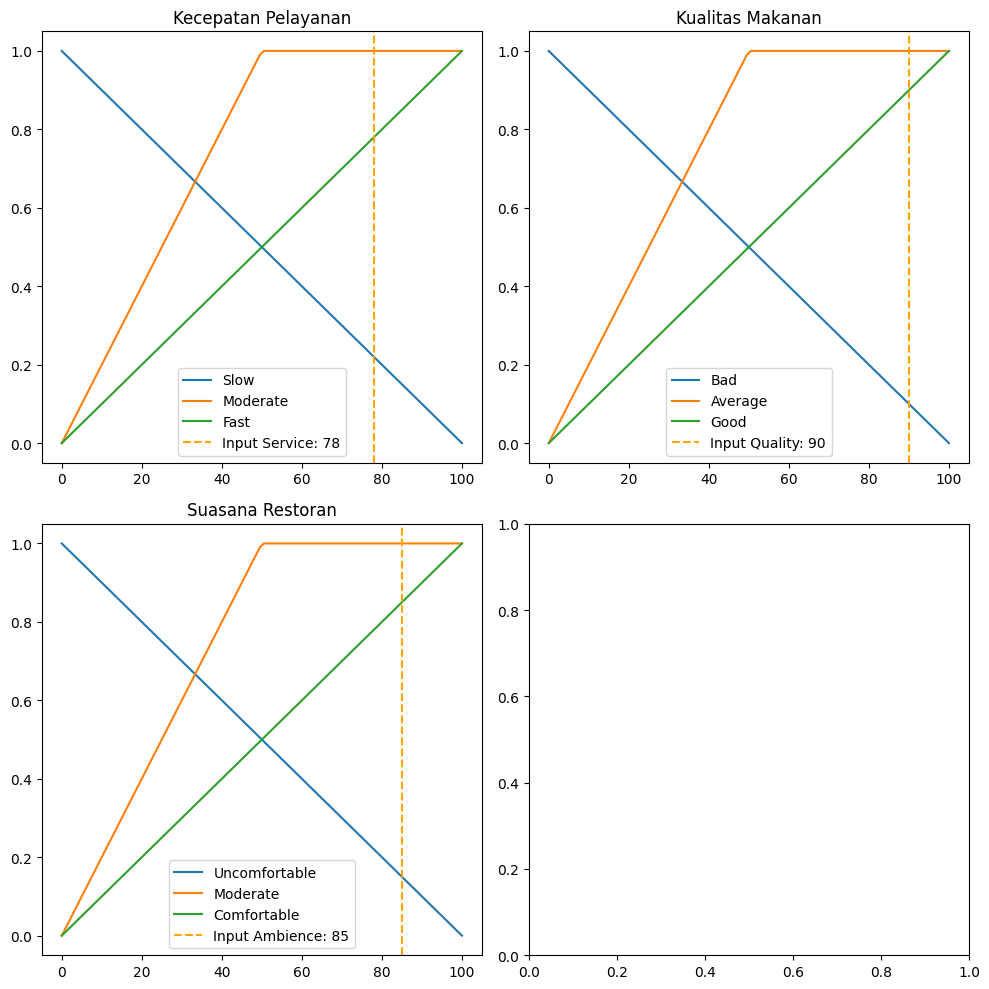

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definisikan nilai input
x_service = 78
x_quality = 90
x_ambience = 85

# Buat range untuk nilai input (0 - 100)
x = np.linspace(0, 100, 100)

# Fungsi keanggotaan untuk Kecepatan Pelayanan (Service Speed)
def service_slow(x):
    return np.maximum(0, np.minimum(1, (100 - x) / 100))

def service_moderate(x):
    return np.maximum(0, np.minimum(1, (x - 0) / 50, (100 - x) / 50))

def service_fast(x):
    return np.maximum(0, np.minimum(1, (x) / 100))

# Fungsi keanggotaan untuk Kualitas Makanan (Food Quality)
def quality_bad(x):
    return np.maximum(0, np.minimum(1, (100 - x) / 100))

def quality_average(x):
    return np.maximum(0, np.minimum(1, (x - 0) / 50, (100 - x) / 50))

def quality_good(x):
    return np.maximum(0, np.minimum(1, (x) / 100))

# Fungsi keanggotaan untuk Suasana Restoran (Ambience)
def ambience_uncomfortable(x):
    return np.maximum(0, np.minimum(1, (100 - x) / 100))

def ambience_moderate(x):
    return np.maximum(0, np.minimum(1, (x - 0) / 50, (100 - x) / 50))

def ambience_comfortable(x):
    return np.maximum(0, np.minimum(1, (x) / 100))

# Plot fungsi keanggotaan
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Kecepatan Pelayanan
axs[0, 0].plot(x, service_slow(x), label='Slow')
axs[0, 0].plot(x, service_moderate(x), label='Moderate')
axs[0, 0].plot(x, service_fast(x), label='Fast')
axs[0, 0].axvline(x=x_service, color='orange', linestyle='--', label=f'Input Service: {x_service}')
axs[0, 0].set_title('Kecepatan Pelayanan')
axs[0, 0].legend()

# Kualitas Makanan
axs[0, 1].plot(x, quality_bad(x), label='Bad')
axs[0, 1].plot(x, quality_average(x), label='Average')
axs[0, 1].plot(x, quality_good(x), label='Good')
axs[0, 1].axvline(x=x_quality, color='orange', linestyle='--', label=f'Input Quality: {x_quality}')
axs[0, 1].set_title('Kualitas Makanan')
axs[0, 1].legend()

# Suasana Restoran
axs[1, 0].plot(x, ambience_uncomfortable(x), label='Uncomfortable')
axs[1, 0].plot(x, ambience_moderate(x), label='Moderate')
axs[1, 0].plot(x, ambience_comfortable(x), label='Comfortable')
axs[1, 0].axvline(x=x_ambience, color='orange', linestyle='--', label=f'Input Ambience: {x_ambience}')
axs[1, 0].set_title('Suasana Restoran')
axs[1, 0].legend()

# Tampilkan grafik
plt.tight_layout()
plt.show()
